In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt

# Data Preprocessing

In [2]:
directory = './temperature-breach-data'
subf = ['transport','waiting']
direc = []
for filename in os.listdir(directory):
    fn = os.path.join(directory, filename)
    direc.append(fn)
print(direc)

['./temperature-breach-data\\breakdown of vehicle during road ransport', './temperature-breach-data\\congestion at port', './temperature-breach-data\\door open', './temperature-breach-data\\incorrect container settings', './temperature-breach-data\\normal', './temperature-breach-data\\reefer cooling unit malfunction', './temperature-breach-data\\shipment delay due to poor doc', './temperature-breach-data\\without precool']


In [3]:
def preprocess(fn):
    
    with open(fn) as f:
        data = (f.readlines())[1:]
    for j in range(len(data)):                                     # Data Preprocessing (Splitting of string i.e. input from notepad)
        if "," in data[j]:
            data[j]=data[j].split(",")
        else:
            data[j]=data[j].split(" ")
        data[j] = list(filter(lambda a: a != "", data[j]))
        data[j] = list(filter(lambda a: a != "\n", data[j]))       # Filter spaces and '\n' from the split data
        data[j] = data[j][1:]
        for k in range(len(data[j])):
            #print(data[j][k])
            try:
                data[j][k] = float(data[j][k])
            except:
                data[j][k] = float(data[j][k].strip(" \n"))        # Convert data values to float

    sensor_temp=[data[-13][-1],data[7][-1]]

    for j in range(len(data)):
        data[j] = sensor_temp+data[j]  
    
    return data

In [5]:
f_data = []
for i in direc:
    for filename in os.listdir(i):
        fn = os.path.join(i, filename)
        if os.path.isfile(fn):
            data = preprocess(fn)[:]
            f_data+=data  
            
    for j in subf:
        j_pa = os.path.join(i,j)
        try:
            tmp = os.listdir(j_pa)
        except:
            continue
        for filename in tmp:
            fn = os.path.join(j_pa, filename)
            data = preprocess(fn)[:]
            f_data+=data              

In [6]:
len(f_data)

864050

In [7]:
print(f_data[-5:])

[[283.7153015, 284.1513367, 0.150000006, -2.500000238, 0.6000000834, 283.2873535], [283.7153015, 284.1513367, -0.6200000048, -2.880000114, 1.870000005, 285.3923035], [283.7153015, 284.1513367, -1.100000024, -4.170000076, 1.789999962, 283.6853638], [283.7153015, 284.1513367, -1.299999952, -2.549999952, 1.580000043, 283.8962097], [283.7153015, 284.1513367, 0.1299999952, -3.799999952, 1.299999952, 283.3642883]]


In [8]:
df = pd.DataFrame(f_data, columns =['Sensor 1 Temp', 'Sensor 2 Temp','X','Y','Z','Temp'])
df.head()

Sensor 1 Temp  Sensor 2 Temp     X     Y      Z        Temp
0     287.065491     288.838776 -0.62 -3.90  1.480  307.927795
1     287.065491     288.838776 -0.43 -3.02  0.109  307.975678
2     287.065491     288.838776 -0.62 -3.20  0.880  307.851410
3     287.065491     288.838776 -0.02 -3.58  0.480  307.797028
4     287.065491     288.838776 -0.64 -4.05  0.520  300.472473

In [ ]:
df.to_csv('data_15-01.csv')

In [9]:
df.shape

(864050, 6)

In [10]:
data = f_data

In [11]:
X = np.array([i[:-1] for i in data])
Y = np.array([[i[-1]] for i in data])

### Experimental Data

In [12]:
dataframe1 = pd.read_excel('expt-data for validationfinal.xlsx')
dataframe1.head()

Unnamed: 0  node-1 (sensor-2)  nodel-2  node-3     node-4  node-5  \
0         NaN               34.8    30.35   35.74  33.573333    24.6   
1         NaN               34.8    30.35   35.64  33.573333    24.6   
2         NaN               34.8    30.34   35.44  33.573333    24.6   
3         NaN               34.8    30.34   35.24  33.573333    24.5   
4         NaN               34.8    30.32   35.10  33.573333    24.5   

   node-6 (sensor-1)  node-7  
0               25.0    26.0  
1               25.0    25.9  
2               25.0    25.8  
3               25.0    25.7  
4               25.0    25.7

In [13]:
X_expt = dataframe1.iloc[:,[6,1]]
X_expt = X_expt+273
X_expt.columns = ['Sensor 1','Sensor 2']

In [14]:
X_expt.head()

Sensor 1  Sensor 2
0     298.0     307.8
1     298.0     307.8
2     298.0     307.8
3     298.0     307.8
4     298.0     307.8

In [15]:
val_Y = dataframe1.iloc[:,[2,3,4,5,7]]
val_Y.columns = ['Node 2','Node 3','Node 4','Node 5','Node 7']
val_Y = val_Y + 273

In [16]:
val_Y.head()

Node 2  Node 3      Node 4  Node 5  Node 7
0  303.35  308.74  306.573333   297.6   299.0
1  303.35  308.64  306.573333   297.6   298.9
2  303.34  308.44  306.573333   297.6   298.8
3  303.34  308.24  306.573333   297.5   298.7
4  303.32  308.10  306.573333   297.5   298.7

In [17]:
coord = [
    [-0.64,-4.05,0.52],
    [-0.3,-4.03,0.01],
    [-0.82,-1.7,0.8],
    [-0.62,-2.88,1.87],
    [-0.3,-1.55,1.72]
]
fin_res = pd.DataFrame()

In [18]:
count=0
for i in coord:
    X_expt['X'] = [i[0]]*(X_expt.shape[0])
    X_expt['Y'] = [i[1]]*(X_expt.shape[0])
    X_expt['Z'] = [i[2]]*(X_expt.shape[0])
    X = np.concatenate((X,X_expt.to_numpy()),axis=0)
    Y_expt = val_Y[val_Y.columns[count]].to_numpy()
    Y = np.concatenate((Y,Y_expt.reshape(Y_expt.shape[0],1)),axis=0)
    count+=1

In [19]:
print(X.shape)
print(Y.shape)

(944535, 5)
(944535, 1)


### Final Data

In [20]:
X_train_in, X_test_in, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
X_train_in.shape

(755628, 5)

In [22]:
X_test_in.shape

(188907, 5)

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=MinMaxScaler()
scaler.fit(X_train_in)

X_train = scaler.transform(X_train_in)
X_test = scaler.transform(X_test_in)

In [56]:
import pickle
scalerfile = 'scalerwitexpt.sav'                             # Saving of Min Max Scaler
pickle.dump(scaler, open(scalerfile, 'wb'))

# Model

In [57]:
model = Sequential()
model.add(Dense(256, input_dim=5, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(16, activation= "relu"))
model.add(Dense(8, activation= "relu"))

#Output layer
model.add(Dense(1))

opt = Adam(learning_rate=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='mean_absolute_error', optimizer=opt,metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 1

In [61]:
history = model.fit(X_train, Y_train, epochs=1000,validation_data=(X_test, Y_test),batch_size=512)

Epoch 1/1000
1476/1476 [==============================] - 4s 2ms/step - loss: 0.6383 - mae: 0.6383 - val_loss: 0.6953 - val_mae: 0.6953
Epoch 2/1000
1476/1476 [==============================] - 3s 2ms/step - loss: 0.6303 - mae: 0.6303 - val_loss: 0.6493 - val_mae: 0.6493
Epoch 3/1000
1476/1476 [==============================] - 3s 2ms/step - loss: 0.6236 - mae: 0.6236 - val_loss: 0.6057 - val_mae: 0.6057
Epoch 4/1000
1476/1476 [==============================] - 3s 2ms/step - loss: 0.6144 - mae: 0.6144 - val_loss: 0.5986 - val_mae: 0.5986
Epoch 5/1000
1476/1476 [==============================] - 3s 2ms/step - loss: 0.6449 - mae: 0.6449 - val_loss: 0.6348 - val_mae: 0.6348
Epoch 6/1000
1476/1476 [==============================] - 3s 2ms/step - loss: 0.6279 - mae: 0.6279 - val_loss: 0.7721 - val_mae: 0.7721
Epoch 7/1000
1476/1476 [==============================] - 3s 2ms/step - loss: 0.6348 - mae: 0.6348 - val_loss: 0.6155 - val_mae: 0.6155
Epoch 8/1000
1476/1476 [========================

Epoch 61/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6101 - mae: 0.6101 - val_loss: 0.6214 - val_mae: 0.6214
Epoch 62/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6088 - mae: 0.6088 - val_loss: 0.5946 - val_mae: 0.5946
Epoch 63/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6088 - mae: 0.6088 - val_loss: 0.6002 - val_mae: 0.6002
Epoch 64/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6219 - mae: 0.6219 - val_loss: 0.6136 - val_mae: 0.6136
Epoch 65/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6059 - mae: 0.6059 - val_loss: 0.5912 - val_mae: 0.5912
Epoch 66/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6123 - mae: 0.6123 - val_loss: 0.6106 - val_mae: 0.6106
Epoch 67/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6055 - mae: 0.6055 - val_loss: 0.6149 - val_mae: 0.6149
Epoch 68/1000
1476/1476 [================

1476/1476 [==============================] - 4s 3ms/step - loss: 0.5995 - mae: 0.5995 - val_loss: 0.6513 - val_mae: 0.6513
Epoch 180/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6025 - mae: 0.6025 - val_loss: 0.6146 - val_mae: 0.6146
Epoch 181/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5983 - mae: 0.5983 - val_loss: 0.6101 - val_mae: 0.6101
Epoch 182/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6031 - mae: 0.6031 - val_loss: 0.6196 - val_mae: 0.6196
Epoch 183/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6016 - mae: 0.6016 - val_loss: 0.5948 - val_mae: 0.5948
Epoch 184/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5981 - mae: 0.5981 - val_loss: 0.5901 - val_mae: 0.5901
Epoch 185/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6013 - mae: 0.6013 - val_loss: 0.6771 - val_mae: 0.6771
Epoch 186/1000
1476/1476 [=======================

1476/1476 [==============================] - 4s 3ms/step - loss: 0.5946 - mae: 0.5946 - val_loss: 0.5773 - val_mae: 0.5773
Epoch 298/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5896 - mae: 0.5896 - val_loss: 0.6099 - val_mae: 0.6099
Epoch 299/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5974 - mae: 0.5974 - val_loss: 0.5917 - val_mae: 0.5917
Epoch 300/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5952 - mae: 0.5952 - val_loss: 0.5757 - val_mae: 0.5757
Epoch 301/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5976 - mae: 0.5976 - val_loss: 0.6149 - val_mae: 0.6149
Epoch 302/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5903 - mae: 0.5903 - val_loss: 0.5990 - val_mae: 0.5990
Epoch 303/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5924 - mae: 0.5924 - val_loss: 0.5765 - val_mae: 0.5765
Epoch 304/1000
1476/1476 [=======================

1476/1476 [==============================] - 4s 3ms/step - loss: 0.5834 - mae: 0.5834 - val_loss: 0.5700 - val_mae: 0.5700
Epoch 416/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5877 - mae: 0.5877 - val_loss: 0.5699 - val_mae: 0.5699
Epoch 417/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5907 - mae: 0.5907 - val_loss: 0.5702 - val_mae: 0.5702
Epoch 418/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5825 - mae: 0.5825 - val_loss: 0.5838 - val_mae: 0.5838
Epoch 419/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6018 - mae: 0.6018 - val_loss: 0.6071 - val_mae: 0.6071
Epoch 420/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6007 - mae: 0.6007 - val_loss: 0.5756 - val_mae: 0.5756
Epoch 421/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5801 - mae: 0.5801 - val_loss: 0.5653 - val_mae: 0.5653
Epoch 422/1000
1476/1476 [=======================

1476/1476 [==============================] - 4s 3ms/step - loss: 0.5774 - mae: 0.5774 - val_loss: 0.5737 - val_mae: 0.5737
Epoch 534/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6006 - mae: 0.6006 - val_loss: 0.5663 - val_mae: 0.5663
Epoch 535/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5958 - mae: 0.5958 - val_loss: 0.6660 - val_mae: 0.6660
Epoch 536/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5772 - mae: 0.5772 - val_loss: 0.5636 - val_mae: 0.5636
Epoch 537/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.6035 - mae: 0.6035 - val_loss: 0.5579 - val_mae: 0.5579
Epoch 538/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5699 - mae: 0.5699 - val_loss: 0.5577 - val_mae: 0.5577
Epoch 539/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5873 - mae: 0.5873 - val_loss: 0.7988 - val_mae: 0.7988
Epoch 540/1000
1476/1476 [=======================

1476/1476 [==============================] - 4s 3ms/step - loss: 0.5742 - mae: 0.5742 - val_loss: 0.5592 - val_mae: 0.5592
Epoch 652/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5786 - mae: 0.5786 - val_loss: 0.5892 - val_mae: 0.5892
Epoch 653/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5697 - mae: 0.5697 - val_loss: 0.5914 - val_mae: 0.5914
Epoch 654/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5700 - mae: 0.5700 - val_loss: 0.5485 - val_mae: 0.5485
Epoch 655/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5689 - mae: 0.5689 - val_loss: 0.5551 - val_mae: 0.5551
Epoch 656/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5746 - mae: 0.5746 - val_loss: 0.7100 - val_mae: 0.7100
Epoch 657/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5678 - mae: 0.5678 - val_loss: 0.5594 - val_mae: 0.5594
Epoch 658/1000
1476/1476 [=======================

1476/1476 [==============================] - 4s 3ms/step - loss: 0.5605 - mae: 0.5605 - val_loss: 0.5420 - val_mae: 0.5420
Epoch 770/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5665 - mae: 0.5665 - val_loss: 0.5426 - val_mae: 0.5426
Epoch 771/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5566 - mae: 0.5566 - val_loss: 0.5468 - val_mae: 0.5468
Epoch 772/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5587 - mae: 0.5587 - val_loss: 0.5792 - val_mae: 0.5792
Epoch 773/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5627 - mae: 0.5627 - val_loss: 0.5661 - val_mae: 0.5661
Epoch 774/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5613 - mae: 0.5613 - val_loss: 0.5574 - val_mae: 0.5574
Epoch 775/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5574 - mae: 0.5574 - val_loss: 0.5784 - val_mae: 0.5784
Epoch 776/1000
1476/1476 [=======================

1476/1476 [==============================] - 4s 3ms/step - loss: 0.5951 - mae: 0.5951 - val_loss: 0.5404 - val_mae: 0.5404
Epoch 888/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5878 - mae: 0.5878 - val_loss: 0.6414 - val_mae: 0.6414
Epoch 889/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5820 - mae: 0.5820 - val_loss: 0.5571 - val_mae: 0.5571
Epoch 890/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5855 - mae: 0.5855 - val_loss: 0.6579 - val_mae: 0.6579
Epoch 891/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5738 - mae: 0.5738 - val_loss: 0.5365 - val_mae: 0.5365
Epoch 892/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5594 - mae: 0.5594 - val_loss: 0.5452 - val_mae: 0.5452
Epoch 893/1000
1476/1476 [==============================] - 4s 3ms/step - loss: 0.5825 - mae: 0.5825 - val_loss: 0.5763 - val_mae: 0.5763
Epoch 894/1000
1476/1476 [=======================

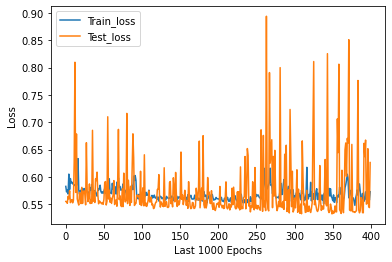

In [62]:
from matplotlib import pyplot as plt

loss = history.history['loss'][600:]
val_loss = history.history['val_loss'][600:]
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel("Last 1000 Epochs")
plt.ylabel("Loss")
plt.legend(['Train_loss', 'Test_loss'])
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(model.predict(X_test), Y_test)

5904/5904 [==============================] - 8s 1ms/step


0.6086364809063715

In [46]:
X_test.shape

(172810, 5)

In [37]:
model.predict(scaler.transform(np.array([[285.695,306,-0.62,-1.32,1.48]])))

1/1 [==============================] - 0s 17ms/step


array([[303.10745]], dtype=float32)

In [64]:
model.save('Model-MinMax-00005-3000withExpt')

INFO:tensorflow:Assets written to: Model-MinMax-00005-3000withExpt\assets


# Prediction

In [24]:
from tensorflow import keras
rel_model = keras.models.load_model('Model-MinMax-00005-3000withExpt')

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(rel_model.predict(X_test), Y_test))
print(mean_absolute_error(rel_model.predict(X_test), Y_test))

5904/5904 [==============================] - 10s 1ms/step
1.9755716453410894
5904/5904 [==============================] - 8s 1ms/step
0.6086364809063715


In [16]:
rel_model.predict(scaler.transform(np.array([[285.695,306.202,3000,-0.62,-1.32,1.48]])))

1/1 [==============================] - 1s 1s/step


array([[279.34567]], dtype=float32)

# Validation

In [26]:
from tensorflow import keras
import pickle

#rel_model = keras.models.load_model('Model-StanSc-00005-700-(0.43,0.5+)')
rel_model = keras.models.load_model('Model-MinMax-00005-3000withExpt')
#rel_model = keras.models.load_model('Model-MinMax-00002-1000-(0.6,0.6+)')

In [27]:
scalerfile = 'scalerwitexpt.sav'
#scalerfile = 'standscaler.sav'
scaler = pickle.load(open(scalerfile, 'rb'))

In [4]:
# from sklearn.metrics import mean_squared_error
# a = rel_model.predict(scaler.transform(X))-Y
# ch = pd.DataFrame()
# ch['test'] = pd.Series(a.flatten())
# ch = ch.abs()
# ch.describe()

In [28]:
dataframe1 = pd.read_excel('expt-data for validationfinal.xlsx')

In [29]:
dataframe1.shape

(16097, 8)

In [30]:
dataframe1

Unnamed: 0  node-1 (sensor-2)    nodel-2     node-3     node-4  \
0             NaN          34.800000  30.350000  35.740000  33.573333   
1             NaN          34.800000  30.350000  35.640000  33.573333   
2             NaN          34.800000  30.340000  35.440000  33.573333   
3             NaN          34.800000  30.340000  35.240000  33.573333   
4             NaN          34.800000  30.320000  35.100000  33.573333   
...           ...                ...        ...        ...        ...   
16092         NaN          11.041313  10.909961   9.971705   9.969400   
16093         NaN          11.036602  10.906125   9.966910   9.969400   
16094         NaN          11.031892  10.902290   9.962115   9.969400   
16095         NaN          11.027181  10.898454   9.957321   9.969400   
16096         NaN          11.022471  10.894618   9.952526   9.969400   

          node-5  node-6 (sensor-1)     node-7  
0      24.600000           25.00000  26.000000  
1      24.600000           25.00000  25.900000  
2      24.600000           25.00000  25.800000  
3      24.500000           25.00000  25.700000  
4      24.500000           25.00000  25.700000  
...          ...                ...        ...  
16092  10.008635            9.95014   9.953093  
16093  10.008635            9.95014   9.953093  
16094  10.008635            9.95014   9.953093  
16095  10.008635            9.95014   9.953093  
16096  10.008635            9.95014   9.953093  

[16097 rows x 8 columns]

In [31]:
X = dataframe1.iloc[:,[6,1]]
X = X+273
X.columns = ['Sensor 1','Sensor 2']

In [32]:
X

Sensor 1    Sensor 2
0      298.00000  307.800000
1      298.00000  307.800000
2      298.00000  307.800000
3      298.00000  307.800000
4      298.00000  307.800000
...          ...         ...
16092  282.95014  284.041313
16093  282.95014  284.036602
16094  282.95014  284.031892
16095  282.95014  284.027181
16096  282.95014  284.022471

[16097 rows x 2 columns]

In [33]:
val_Y = dataframe1.iloc[:,[2,3,4,5,7]]
val_Y.columns = ['Node 2','Node 3','Node 4','Node 5','Node 7']
val_Y = val_Y + 273

In [34]:
val_Y

Node 2      Node 3      Node 4      Node 5      Node 7
0      303.350000  308.740000  306.573333  297.600000  299.000000
1      303.350000  308.640000  306.573333  297.600000  298.900000
2      303.340000  308.440000  306.573333  297.600000  298.800000
3      303.340000  308.240000  306.573333  297.500000  298.700000
4      303.320000  308.100000  306.573333  297.500000  298.700000
...           ...         ...         ...         ...         ...
16092  283.909961  282.971705  282.969400  283.008635  282.953093
16093  283.906125  282.966910  282.969400  283.008635  282.953093
16094  283.902290  282.962115  282.969400  283.008635  282.953093
16095  283.898454  282.957321  282.969400  283.008635  282.953093
16096  283.894618  282.952526  282.969400  283.008635  282.953093

[16097 rows x 5 columns]

In [35]:
coord = [
    [-0.64,-4.05,0.52],
    [-0.3,-4.03,0.01],
    [-0.82,-1.7,0.8],
    [-0.62,-2.88,1.87],
    [-0.3,-1.55,1.72]
]
fin_res = pd.DataFrame()

In [36]:
count=0
for i in coord:
    X['X'] = [i[0]]*(X.shape[0])
    X['Y'] = [i[1]]*(X.shape[0])
    X['Z'] = [i[2]]*(X.shape[0])
    print(X.head(20))
    val_X = X.to_numpy()
    #scaler.fit(val_X)
    out_val = rel_model.predict(scaler.transform(val_X))
    fin_res[val_Y.columns[count]] = pd.Series (out_val.flatten())
    count+=1

    Sensor 1  Sensor 2     X     Y     Z
0      298.0     307.8 -0.64 -4.05  0.52
1      298.0     307.8 -0.64 -4.05  0.52
2      298.0     307.8 -0.64 -4.05  0.52
3      298.0     307.8 -0.64 -4.05  0.52
4      298.0     307.8 -0.64 -4.05  0.52
5      298.0     307.8 -0.64 -4.05  0.52
6      297.9     307.8 -0.64 -4.05  0.52
7      297.9     307.8 -0.64 -4.05  0.52
8      297.9     307.8 -0.64 -4.05  0.52
9      297.9     307.8 -0.64 -4.05  0.52
10     297.9     307.8 -0.64 -4.05  0.52
11     297.9     307.8 -0.64 -4.05  0.52
12     297.9     307.8 -0.64 -4.05  0.52
13     297.8     307.8 -0.64 -4.05  0.52
14     297.8     307.8 -0.64 -4.05  0.52
15     297.8     307.8 -0.64 -4.05  0.52
16     297.8     307.8 -0.64 -4.05  0.52
17     297.7     307.8 -0.64 -4.05  0.52
18     297.7     307.8 -0.64 -4.05  0.52
19     297.7     307.8 -0.64 -4.05  0.52
504/504 [==============================] - 1s 1ms/step
    Sensor 1  Sensor 2    X     Y     Z
0      298.0     307.8 -0.3 -4.03  0.01
1   

In [37]:
test = fin_res - val_Y
test['Sensor 1']  = X['Sensor 1']
test['Sensor 2']  = X['Sensor 2']
test = test.astype(float)
test = test.abs()
pd.set_option('display.max_rows', None)

In [38]:
test

Node 2    Node 3    Node 4    Node 5    Node 7    Sensor 1  \
0      0.097449  1.103037  0.902313  0.068640  0.026550  298.000000   
1      0.097449  1.003037  0.902313  0.068640  0.126550  298.000000   
2      0.107449  0.803037  0.902313  0.068640  0.226550  298.000000   
3      0.107449  0.603037  0.902313  0.168640  0.326550  298.000000   
4      0.127449  0.463037  0.902313  0.168640  0.326550  298.000000   
5      0.127449  0.463037  0.902313  0.168640  0.326550  298.000000   
6      0.027250  0.757612  0.902313  0.007751  0.165662  297.900000   
7      0.037250  0.757612  0.768979  0.007751  0.165662  297.900000   
8      0.057250  0.717612  0.768979  0.107751  0.165662  297.900000   
9      0.057250  0.717612  0.768979  0.107751  0.265662  297.900000   
10     0.817250  0.697612  0.768979  0.207751  0.265662  297.900000   
11     0.817250  0.677612  0.768979  0.207751  0.265662  297.900000   
12     0.817250  0.637612  0.768979  0.207751  0.265662  297.900000   
13     0.656361  0.798501  0.758420  0.046863  0.162665  297.800000   
14     0.656361  0.678501  0.758420  0.046863  0.162665  297.800000   
15     0.656361  0.478501  0.758420  0.146863  0.162665  297.800000   
16     0.656361  0.278501  0.758420  0.146863  0.162665  297.800000   
17     0.502705  0.339390  0.691754  0.014026  0.012366  297.700000   
18     0.502705  0.139390  0.625087  0.014026  0.112366  297.700000   
19     0.502705  0.060610  0.625087  0.014026  0.112366  297.700000   
20     0.502705  0.160610  0.558420  0.014026  0.112366  297.700000   
21     0.502705  0.260610  0.491754  0.085974  0.112366  297.700000   
22     0.502705  0.360610  0.425087  0.085974  0.112366  297.700000   
23     0.502705  0.460610  0.425087  0.085974  0.212366  297.700000   
24     0.502705  0.580610  0.425087  0.085974  0.212366  297.700000   
25     0.341816  0.336594  0.199285  0.017023  0.058679  297.600000   
26     0.341816  0.356594  0.199285  0.082977  0.058679  297.600000   
27     0.341816  0.356594  0.199285  0.082977  0.058679  297.600000   
28     0.341816  0.376594  0.199285  0.082977  0.158679  297.600000   
29     0.341816  0.436594  0.199285  0.082977  0.158679  297.600000   
30     0.341816  0.456594  0.065952  0.082977  0.158679  297.600000   
31     0.341816  0.516594  0.065952  0.082977  0.158679  297.600000   
32     0.341816  0.636594  0.065952  0.182977  0.158679  297.600000   
33     0.188130  0.485146  0.015293  0.132288  0.002209  297.500000   
34     0.188130  0.545146  0.118040  0.132288  0.097791  297.500000   
35     0.188130  0.551813  0.118040  0.132288  0.097791  297.500000   
36     0.188130  0.551813  0.118040  0.132288  0.097791  297.500000   
37     0.188130  0.551813  0.184707  0.132288  0.197791  297.500000   
38     0.188130  0.551813  0.184707  0.232288  0.197791  297.500000   
39     0.180928  0.398127  0.200715  0.122119  0.180029  297.400000   
40     0.180928  0.398127  0.200715  0.122119  0.180029  297.400000   
41     0.180928  0.398127  0.200715  0.122119  0.180029  297.400000   
42     0.180928  0.411460  0.200715  0.122119  0.180029  297.400000   
43     0.180928  0.431460  0.200715  0.122119  0.280029  297.400000   
44     0.180928  0.451460  0.267381  0.122119  0.280029  297.400000   
45     0.180928  0.531460  0.334048  0.222119  0.280029  297.400000   
46     1.620928  0.531460  0.400715  0.222119  0.280029  297.400000   
47     1.620928  0.531460  0.400715  0.222119  0.280029  297.400000   
48     1.467241  0.370571  0.458576  0.222119  0.136902  297.300000   
49     1.467241  0.390571  0.525243  0.322119  0.136902  297.300000   
50     1.467241  0.420571  0.591909  0.322119  0.136902  297.300000   
51     1.467241  0.420571  0.591909  0.322119  0.236902  297.300000   
52     1.467241  0.420571  0.658576  0.322119  0.236902  297.300000   
53     1.467241  0.420571  0.791909  0.322119  0.236902  297.300000   
54     1.467241  0.420571  0.991909  0.322119  0.236902  297.300000   
55     1.467241  0.420571  1.1252

In [39]:
test.describe()

Node 2        Node 3        Node 4        Node 5        Node 7  \
count  16097.000000  16097.000000  16097.000000  16097.000000  16097.000000   
mean       0.169012      0.219618      0.510197      0.706153      0.608708   
std        0.244159      0.325591      0.702966      1.003694      0.795965   
min        0.000535      0.000296      0.002600      0.000051      0.002209   
25%        0.092617      0.127124      0.117712      0.218103      0.174188   
50%        0.132617      0.154266      0.178601      0.260211      0.274188   
75%        0.174136      0.211169      0.472186      0.421100      0.485767   
max        3.772205      5.743764      3.387158      6.129608      5.410620   

           Sensor 1      Sensor 2  
count  16097.000000  16097.000000  
mean     286.816798    287.680952  
std        1.430950      2.830792  
min      282.950140    284.022471  
25%      286.700000    286.320000  
50%      286.800000    287.246667  
75%      286.900000    287.383333  
max      298.000000    307.800000